# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- 2.1 скорректировать заголовки;
- 2.2 скорректировать типы признаков;
- 2.3 проверить наличие дублирующихся записей;
- 2.4 проверить наличие аномальных значений;
- 2.5 восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- 3.1 по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- 3.2 по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;

**Шаг 4.** Провести исследовательский анализ данных:
- 4.1 в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- 4.2 в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- 4.3 клиенты каких возрастных категорий (ТОП-2):

    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- 4.4 с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings ("ignore")

In [2]:
# Шаг 1. Загрузка данных
df = pd.read_csv ('/content/dataset_telecom.csv')

In [3]:
# Первое знакомство с данными
df

Возраст  Среднемесячный расход  Средняя продолжительность разговоров  \
0          24                    NaN                                   2.4   
1          51                 287.51                                   1.7   
2          41                 113.70                                   2.1   
3          35                 410.23                                   5.6   
4          26                 537.60                                   4.8   
...       ...                    ...                                   ...   
4487       40                 186.20                                   3.7   
4488       40                 500.68                                   6.0   
4489       60                 470.42                                   3.5   
4490       38                 858.99                                   9.3   
4491       33                 151.92                                   1.5   

      Звонков днем за месяц  Звонков вечером за месяц Звонков ночью за месяц  \
0                      12.0                      65.0                      5   
1                     111.0                     109.0                      1   
2                      41.0                      27.0                      0   
3                      47.0                      49.0                      0   
4                      58.0                      77.0                      4   
...                     ...                       ...                    ...   
4487                   36.0                      28.0                      2   
4488                   46.0                      66.0                      0   
4489                   58.0                     129.0                      2   
4490                   50.0                      74.0                      0   
4491                   59.0                      75.0                      2   

     Звонки в другие города  Звонки в другие страны  \
0                         0                       0   
1                        44                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
...                     ...                     ...   
4487                      6                       0   
4488                      6                       0   
4489                      4                       0   
4490                      0                       0   
4491                      1                       0   

     Доля звонков на стационарные телефоны Количество SMS за месяц  \
0                                        5                      56   
1                                        6                       1   
2                                        1                      36   
3                                       11                      23   
4                                       16                      29   
...                                    ...                     ...   
4487                                    12                      30   
4488                                    15                      23   
4489                                    19                       5   
4490                                    28                      69   
4491                                     8                      24   

     Дата подключения тарифа  
0        2018-06-17 12:14:35  
1        2021-10-21 15:39:54  
2        2015-03-26 11:26:15  
3        2016-01-04 15:53:20  
4        2017-05-03 13:33:53  
...                      ...  
4487     2021-04-10 14:58:23  
4488     2021-09-22 14:52:43  
4489     2019-04-04 17:33:38  
4490     2015-12-30 16:28:26  
4491     2019-04-14 11:59:10  

[4492 rows x 11 columns]

In [4]:
# Уточняем тип данных в дате
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [5]:
# Шаг 2. Первичная обработка данных
# Шаг 2.1 пропускаем, заголовки не требуют правки
# Шаг 2.2 Смена типа данных колонки Дата подключения тарифа
df['Дата подключения тарифа'] = pd.to_datetime (df['Дата подключения тарифа'])


In [6]:
# функция для изменения типа данных
def str_to_int (x : str) -> float:
  if x.isdigit ():
    return float (x)
  else:
    return float (x.replace("'",''))

In [7]:
columns = ['Звонков ночью за месяц',
          'Звонки в другие города',
          'Доля звонков на стационарные телефоны',
          'Количество SMS за месяц']

for col in columns:
    df[col] = df[col].apply (str_to_int)

In [8]:
# Проверка.Тип данных изменен с object на float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Возраст                                4492 non-null   int64         
 1   Среднемесячный расход                  4468 non-null   float64       
 2   Средняя продолжительность разговоров   4475 non-null   float64       
 3   Звонков днем за месяц                  4472 non-null   float64       
 4   Звонков вечером за месяц               4489 non-null   float64       
 5   Звонков ночью за месяц                 4492 non-null   float64       
 6   Звонки в другие города                 4492 non-null   float64       
 7   Звонки в другие страны                 4492 non-null   int64         
 8   Доля звонков на стационарные телефоны  4492 non-null   float64       
 9   Количество SMS за месяц                4492 non-null   float64 

In [9]:
# Шаг 2.3 Проверка наличия дублей
df.duplicated().sum()

0

In [10]:
# Шаг 2.4 Проверка наличие аномальных значений
percentile = [.01, .05, .25, .5, .75, .95, .9, .99]
df.describe(percentiles = percentile)

Возраст  Среднемесячный расход  \
count  4492.000000            4468.000000   
mean     41.894924             505.533577   
std      13.077254             646.354693   
min      19.000000               3.180000   
1%       19.000000               7.790100   
5%       20.000000              16.800000   
25%      31.000000             152.490000   
50%      43.000000             315.510000   
75%      52.000000             599.840000   
90%      58.000000            1068.250000   
95%      63.000000            1610.304500   
99%      69.000000            3544.902900   
max      70.000000            5142.760000   

       Средняя продолжительность разговоров  Звонков днем за месяц  \
count                           4475.000000            4472.000000   
mean                               4.230827              63.899374   
std                                3.005210              62.877394   
min                                0.100000               1.000000   
1%                                 0.400000               2.000000   
5%                                 1.100000               5.000000   
25%                                2.100000              37.000000   
50%                                3.300000              53.000000   
75%                                5.900000              68.000000   
90%                                8.300000             104.000000   
95%                                9.700000             133.000000   
99%                               14.452000             391.160000   
max                               20.000000             500.000000   

       Звонков вечером за месяц  Звонков ночью за месяц  \
count               4489.000000             4492.000000   
mean                  70.363778                6.273152   
std                   41.219909               14.713034   
min                    1.000000                0.000000   
1%                     2.000000                0.000000   
5%                     4.000000                0.000000   
25%                   42.000000                0.000000   
50%                   71.000000                1.000000   
75%                   98.000000                5.000000   
90%                  128.000000               19.000000   
95%                  142.000000               35.000000   
99%                  156.000000               84.000000   
max                  160.000000              110.000000   

       Звонки в другие города  Звонки в другие страны  \
count             4492.000000             4492.000000   
mean                 8.661175                0.394034   
std                 13.478042                1.171980   
min                  0.000000                0.000000   
1%                   0.000000                0.000000   
5%                   0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  2.000000                0.000000   
75%                 12.000000                0.000000   
90%                 31.000000                1.000000   
95%                 38.450000                2.000000   
99%                 46.090000                6.000000   
max                 88.000000               12.000000   

       Доля звонков на стационарные телефоны  Количество SMS за месяц  
count                            4492.000000              4492.000000  
mean                               10.331701                21.243321  
std                                 9.222693                27.911864  
min                                 0.000000                 0.000000  
1%                                  0.000000                 0.000000  
5%                                  0.000000                 0.000000  
25%                                 3.000000                 3.000000  
50%                                 8.000000                 6.000000  
75%                                16.000000                32.000000  
90%                                23.000000         

1. Около 10% пользователей совершают международные звонки
2. 25% пользователей платят менее 152.5 рублей в месяц
3. Около 50% пользователей не совершают звонки ночью
4. Менее 50% пользователей не совершают звонки в другие города
5. Около 25% пользователей не отправляют СМС
6. Около 25% пользователей не звонят на стационарные телефоны

In [11]:
# Аномалии пункт 1
display(
np.round(((df['Звонки в другие страны'] > 0).
          sum() / df.shape[0] * 100), 2), # Процент звонящих зарубеж
np.round(((df['Звонки в другие страны'] >= 2).
          sum() / df.shape[0] * 100), 2)) # Процент регулярно звонящих зарубеж

18.32

9.73

Менее 20% пользователей совершают международные звонки, более половины из них – с регулярностью не менее 2 звонков в месяц. Данный критерий имеет высокую доходность. Разделим дата фрейм на два по этому признаку.

In [12]:
df_country = df.loc[df['Звонки в другие страны'] >= 2]
df_not_country = df.loc[~(df['Звонки в другие страны'] >= 2)].\
                        drop(columns = 'Звонки в другие страны')

In [13]:
df_not_country

Возраст  Среднемесячный расход  Средняя продолжительность разговоров  \
0          24                    NaN                                   2.4   
1          51                 287.51                                   1.7   
2          41                 113.70                                   2.1   
3          35                 410.23                                   5.6   
4          26                 537.60                                   4.8   
...       ...                    ...                                   ...   
4487       40                 186.20                                   3.7   
4488       40                 500.68                                   6.0   
4489       60                 470.42                                   3.5   
4490       38                 858.99                                   9.3   
4491       33                 151.92                                   1.5   

      Звонков днем за месяц  Звонков вечером за месяц  Звонков ночью за месяц  \
0                      12.0                      65.0                     5.0   
1                     111.0                     109.0                     1.0   
2                      41.0                      27.0                     0.0   
3                      47.0                      49.0                     0.0   
4                      58.0                      77.0                     4.0   
...                     ...                       ...                     ...   
4487                   36.0                      28.0                     2.0   
4488                   46.0                      66.0                     0.0   
4489                   58.0                     129.0                     2.0   
4490                   50.0                      74.0                     0.0   
4491                   59.0                      75.0                     2.0   

      Звонки в другие города  Доля звонков на стационарные телефоны  \
0                        0.0                                    5.0   
1                       44.0                                    6.0   
2                        0.0                                    1.0   
3                        0.0                                   11.0   
4                        0.0                                   16.0   
...                      ...                                    ...   
4487                     6.0                                   12.0   
4488                     6.0                                   15.0   
4489                     4.0                                   19.0   
4490                     0.0                                   28.0   
4491                     1.0                                    8.0   

      Количество SMS за месяц Дата подключения тарифа  
0                        56.0     2018-06-17 12:14:35  
1                         1.0     2021-10-21 15:39:54  
2                        36.0     2015-03-26 11:26:15  
3                        23.0     2016-01-04 15:53:20  
4                        29.0     2017-05-03 13:33:53  
...                       ...                     ...  
4487                     30.0     2021-04-10 14:58:23  
4488                     23.0     2021-09-22 14:52:43  
4489                      5.0     2019-04-04 17:33:38  
4490                     69.0     2015-12-30 16:28:26  
4491                     24.0     2019-04-14 11:59:10  

[4055 rows x 10 columns]

In [14]:
# Аномалии пункт 2
display(
        np.round(((df['Среднемесячный расход'] < 152.5).
        sum() / df.shape[0] * 100), 2)) # Процент пользователей с низким расходом


24.87

Почти четверть пользователей имеет низкий среднемесячный расход.
- провести анализ

In [15]:
# Аномалии пункт 3
display(
        np.round(((df['Звонков ночью за месяц'] > 0).
        sum() / df.shape[0] * 100), 2)) # Процент пользователей, звонящих ночью

53.18

Более половины пользователей звонят ночью.
- проверить возможные проблемы с часовыми поясами
- соотнести пользователей с возрастными/поведенческими группами

In [16]:
# Аномалии пункт 4
display(
  np.round(((df['Звонки в другие города'] > 0).
  sum() / df.shape[0] * 100), 2)) # Процент пользователей, звонящих по межгороду

53.72

Более половины пользователей звонят по межгороду.
- соотнести с возрастными группами

In [17]:
# Аномалии пункт 5
display(
  np.round(((df['Количество SMS за месяц'] > 0).
  sum() / df.shape[0] * 100), 2)) # Процент пользователей, пользующихся СМС

89.0

Более 10% пользователей не используют СМС.


In [18]:
# Аномалии пункт 6
display(
  np.round(((df['Доля звонков на стационарные телефоны'] > 0).
  sum() / df.shape[0] * 100), 2)) # Процент пользователей, пользующихся СМС

87.6

Более 10% пользователей не звонят на стационарные номера телефонов.

In [19]:
# Шаг 2.5 Восстановить пропущенные значения
df_not_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Возраст                                4055 non-null   int64         
 1   Среднемесячный расход                  4033 non-null   float64       
 2   Средняя продолжительность разговоров   4040 non-null   float64       
 3   Звонков днем за месяц                  4036 non-null   float64       
 4   Звонков вечером за месяц               4052 non-null   float64       
 5   Звонков ночью за месяц                 4055 non-null   float64       
 6   Звонки в другие города                 4055 non-null   float64       
 7   Доля звонков на стационарные телефоны  4055 non-null   float64       
 8   Количество SMS за месяц                4055 non-null   float64       
 9   Дата подключения тарифа                4055 non-null   datetime

In [20]:
# смотрим кол-во пропусков
df_not_country.isna().sum()

Возраст                                   0
Среднемесячный расход                    22
Средняя продолжительность разговоров     15
Звонков днем за месяц                    19
Звонков вечером за месяц                  3
Звонков ночью за месяц                    0
Звонки в другие города                    0
Доля звонков на стационарные телефоны     0
Количество SMS за месяц                   0
Дата подключения тарифа                   0
dtype: int64

In [21]:
# так как пропусков мало, удаляем записи с пропусками
df_not_country = df_not_country.dropna()

In [22]:
# Возвращаемся к Шагу 2.4 Проверка наличия аномальных значений
# Применим метод "ящик с усами"
def calc_boxplot (df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile (np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress (np.asarray(df_col.dropna()) <= hival,\
                          np.asarray(df_col.dropna()))
    wisklo = np.compress (np.asarray(df_col.dropna()) >= loval,\
                          np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [23]:
# смотрим на заголовки для выделения признаков
df_not_country.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Доля звонков на стационарные телефоны',
       'Количество SMS за месяц', 'Дата подключения тарифа'],
      dtype='object')

In [24]:
# выделим непрерывные признаки из даты
cont_var = ['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Доля звонков на стационарные телефоны',
       'Количество SMS за месяц']

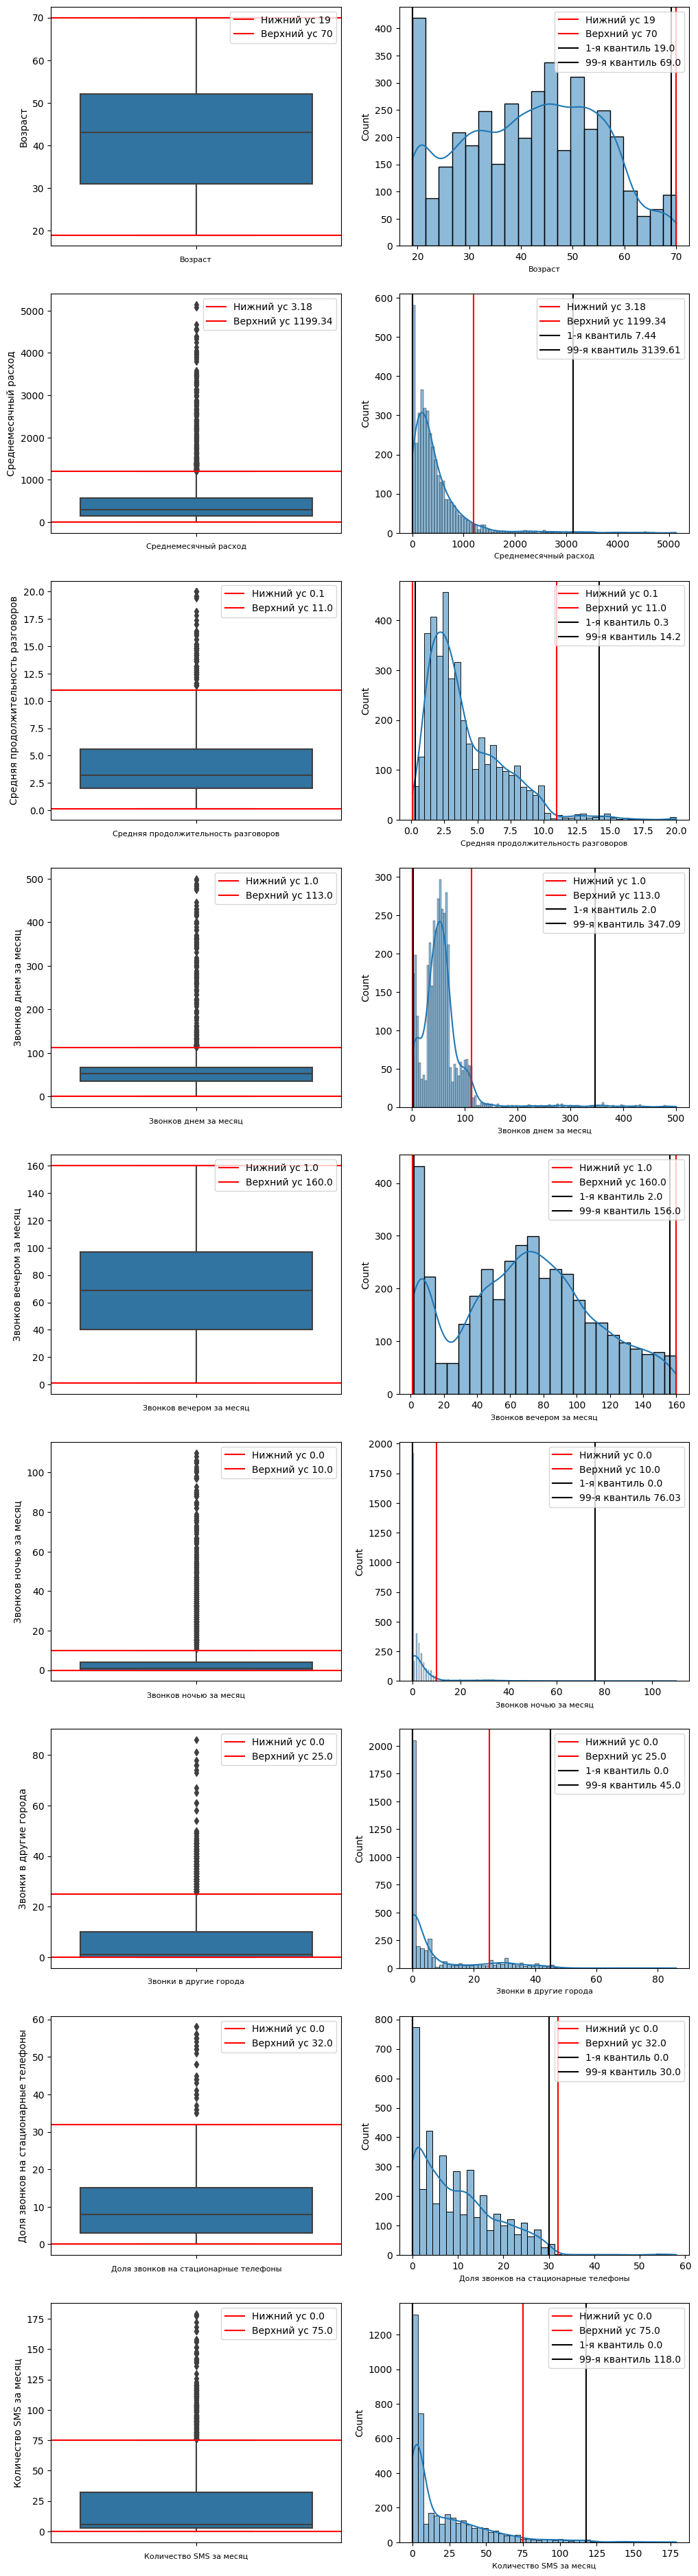

In [25]:
# рисуем ящики с усами и столбчатую диаграмму для всех непрерывных признаков
fig, ax = plt.subplots (len(cont_var), 2, figsize = (12, 48))

for index, col in enumerate (cont_var):
    plt.subplot (len(cont_var), 2, 2*index + 1)
    ax = sns.boxplot (y = df_not_country[col])
    plt.xlabel (col, fontsize = 8)
    value_low, value_upper = calc_boxplot(df_not_country[col])
    plt.axhline (value_low,
                color = 'red',
                label = 'Нижний ус {}'.format(np.round(value_low,2))
                )
    plt.axhline (value_upper,
                color = 'red',
                label = 'Верхний ус {}'.format(np.round(value_upper,2))
                )

    plt.legend (loc='upper right')

    plt.subplot( len(cont_var), 2, 2*index + 2)
    ax = sns.histplot (df_not_country[col],
                      kde = True
                      )
    ax.set_xlabel (col, fontsize = 8)

    value_low, value_upper = calc_boxplot(df_not_country[col])
    plt.axvline (value_low,
                color = 'red',
                label = 'Нижний ус {}'.format(np.round(value_low,2))
                )
    plt.axvline (value_upper,
                color = 'red',
                label = 'Верхний ус {}'.format(np.round(value_upper,2))
                )

    plt.legend (loc='upper right')

    per_1 = np.percentile(df_not_country[col].dropna(), 1)
    per_99 = np.percentile(df_not_country[col].dropna(), 99)

    plt.axvline (per_1,
                color = 'black',
                label = '1-я квантиль {}'.format(np.round(per_1,2))
                )
    plt.axvline (per_99,
                color = 'black',
                label = '99-я квантиль {}'.format(np.round(per_99,2))
                )

    plt.legend (loc = 'upper right')

Вывод по шагу 2.4
Проверка наличия аномальных значений

|Признак|Аномальные значения|
|--:|:--|
|Возраст|Не обнаружено, но много записей с 19-20 летними|
|Среднемесячный расход| Аномалии от 1199. Замечание о категории с низким ежемесячным расходом, из предыдущего пункта, рассмотрено не будет|
|Средняя продолжительность разговоров|Аномалии от 11|
|Звонков днем за месяц|Аномалии от 113, но есть немного клиентов, которые совершают очень много звонков|
|Звонков вечером за месяц|Аномалий не обнаружено|
|Звонков ночью за месяц|Аномалии от 10 звонков, но есть небольшое количество пользователей, которые ночью совершают большое количество звонков. Предположительно, люди, работающие ночью, либо студенты.|
|Звонки в другие города|Аномалии от 25|
|Доля звонков на стационарные телефоны|Аномалии от 32|
|Количество SMS за месяц|Аномалии от 75, но небольшое количество клиентов много отправляют SMS. Рассмотреть в совокупности с параметром Возраст|

ДАЛЕЕ ОЧИСТКА ДАННЫХ ОТ АНОМАЛИЙ

In [26]:
# проверка процента сохранности даты при удалении данных по "усам"
df_not_country[
    (df_not_country['Среднемесячный расход'] < 1119) &
    (df_not_country['Средняя продолжительность разговоров'] < 11) &
    (df_not_country['Звонков днем за месяц'] < 113) &
    (df_not_country['Звонков ночью за месяц'] < 10) &
    (df_not_country['Звонки в другие города'] < 25) &
    (df_not_country['Доля звонков на стационарные телефоны'] < 32) &
    (df_not_country['Количество SMS за месяц'] < 75)
    ].shape[0] / df_not_country.shape[0] * 100

72.06103051525763

In [27]:
# проверка процента сохранности даты при удалении данных по 99ой квантили
df_not_country[
    (df_not_country['Среднемесячный расход'] < 3134) &
    (df_not_country['Средняя продолжительность разговоров'] < 11) &
    (df_not_country['Звонков днем за месяц'] < 346) &
    (df_not_country['Звонков ночью за месяц'] < 80) &
    (df_not_country['Звонки в другие города'] < 45) &
    (df_not_country['Доля звонков на стационарные телефоны'] < 32) &
    (df_not_country['Количество SMS за месяц'] < 125)
    ].shape[0] / df_not_country.shape[0] * 100

94.79739869934967

In [28]:
# для дальнейшей работы формирую дату до 99 квантили
df_work = df_not_country[
    (df_not_country['Среднемесячный расход'] < 3134) &
    (df_not_country['Средняя продолжительность разговоров'] < 11) &
    (df_not_country['Звонков днем за месяц'] < 346) &
    (df_not_country['Звонков ночью за месяц'] < 80) &
    (df_not_country['Звонки в другие города'] < 45) &
    (df_not_country['Доля звонков на стационарные телефоны'] < 32) &
    (df_not_country['Количество SMS за месяц'] < 125)
    ]

Шаг 3. Добавление новых переменных.

In [29]:
# Шаг 3.1 На основании признака Возраст вводим переменную Возрастная категория
# Ниже представлена функция разделения по Возрасту
def age_cat(age : int) -> str:

  """
  Разделение возрастной категории
  """
  if (age >= 19) & (age <= 24):
      return 'студент'
  elif (age >= 25) & (age <= 33):
      return 'аспирант'
  elif (age >= 34) & (age <= 56):
      return 'бизнесмен'
  else:
      return 'знаток'

In [30]:
# применяем функцию разделения по признаку Возраст
df_work.loc[:,'Возрастная категория'] =  df_work['Возраст'].apply(age_cat)

In [31]:
# проверка получившегося результата
df_work[['Возраст', 'Возрастная категория']]

Возраст Возрастная категория
1          51            бизнесмен
2          41            бизнесмен
3          35            бизнесмен
4          26             аспирант
5          26             аспирант
...       ...                  ...
4487       40            бизнесмен
4488       40            бизнесмен
4489       60               знаток
4490       38            бизнесмен
4491       33             аспирант

[3790 rows x 2 columns]

In [32]:
# распределение по категориям
df_work['Возрастная категория'].value_counts()

бизнесмен    2096
аспирант      616
знаток        579
студент       499
Name: Возрастная категория, dtype: int64

In [33]:
# Шаг 3.2 по значениям признака Дата подключения тарифа создайте признаки:
# Год подключения, Месяц подключения, Дата подключения
# Проверка на перекрытие временного интервала
df_work['Дата подключения тарифа'].agg(['min', 'max'])

min   2015-01-01 15:48:33
max   2021-12-31 14:12:11
Name: Дата подключения тарифа, dtype: datetime64[ns]

In [34]:
# вводим новые признаки
df_work['Год подключения'] = df_work['Дата подключения тарифа'].dt.year
df_work['Месяц подключения'] = df_work['Дата подключения тарифа'].dt.strftime('%Y-%m')
df_work['Дата подключения'] = df_work['Дата подключения тарифа'].dt.date

In [35]:
# проверка результата
df_work[['Дата подключения тарифа', 'Год подключения', 'Месяц подключения', 'Дата подключения']].head(5)

Дата подключения тарифа  Год подключения Месяц подключения Дата подключения
1     2021-10-21 15:39:54             2021           2021-10       2021-10-21
2     2015-03-26 11:26:15             2015           2015-03       2015-03-26
3     2016-01-04 15:53:20             2016           2016-01       2016-01-04
4     2017-05-03 13:33:53             2017           2017-05       2017-05-03
5     2016-11-13 15:53:16             2016           2016-11       2016-11-13

[Text(0, 0, '499'),
 Text(0, 0, '556'),
 Text(0, 0, '573'),
 Text(0, 0, '566'),
 Text(0, 0, '504'),
 Text(0, 0, '544'),
 Text(0, 0, '548')]

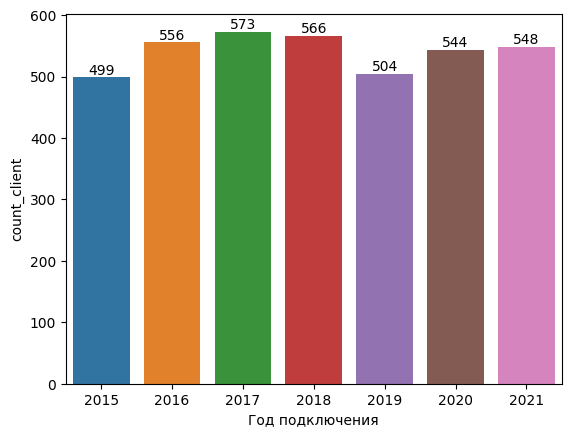

In [36]:
# Шаг 4. Провести исследовательский анализ данных
# Шаг 4.1 Рассмотрим подключение клиентов/год
df_count_client_year = df_work.groupby('Год подключения').\
agg(count_client = ('Год подключения','count')).\
reset_index()

ax = sns.barplot(data = df_count_client_year,
            x = 'Год подключения',
            y = 'count_client');
ax.bar_label(ax.containers[0])

In [37]:
# минимум, максимум, медиана по годам
df_count_client_year['count_client'].agg(['min', 'median', 'max'])

min       499.0
median    548.0
max       573.0
Name: count_client, dtype: float64

Вывод: Максимум был в 2017 году, составлял 573 пользователей. Минимум - в 2015 году, 499 пользователей.

[Text(0, 0, '28'),
 Text(0, 0, '51'),
 Text(0, 0, '36'),
 Text(0, 0, '44'),
 Text(0, 0, '49'),
 Text(0, 0, '42'),
 Text(0, 0, '44'),
 Text(0, 0, '39'),
 Text(0, 0, '31'),
 Text(0, 0, '49'),
 Text(0, 0, '43'),
 Text(0, 0, '43'),
 Text(0, 0, '55'),
 Text(0, 0, '57'),
 Text(0, 0, '42'),
 Text(0, 0, '38'),
 Text(0, 0, '45'),
 Text(0, 0, '43'),
 Text(0, 0, '41'),
 Text(0, 0, '62'),
 Text(0, 0, '57'),
 Text(0, 0, '38'),
 Text(0, 0, '42'),
 Text(0, 0, '36'),
 Text(0, 0, '47'),
 Text(0, 0, '40'),
 Text(0, 0, '43'),
 Text(0, 0, '49'),
 Text(0, 0, '53'),
 Text(0, 0, '54'),
 Text(0, 0, '38'),
 Text(0, 0, '52'),
 Text(0, 0, '54'),
 Text(0, 0, '52'),
 Text(0, 0, '40'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Text(0, 0, '48'),
 Text(0, 0, '32'),
 Text(0, 0, '49'),
 Text(0, 0, '53'),
 Text(0, 0, '47'),
 Text(0, 0, '41'),
 Text(0, 0, '49'),
 Text(0, 0, '48'),
 Text(0, 0, '48'),
 Text(0, 0, '53'),
 Text(0, 0, '46'),
 Text(0, 0, '42'),
 Text(0, 0, '39'),
 Text(0, 0, '35'),
 Text(0, 0, '44'),
 Text(0, 0, 

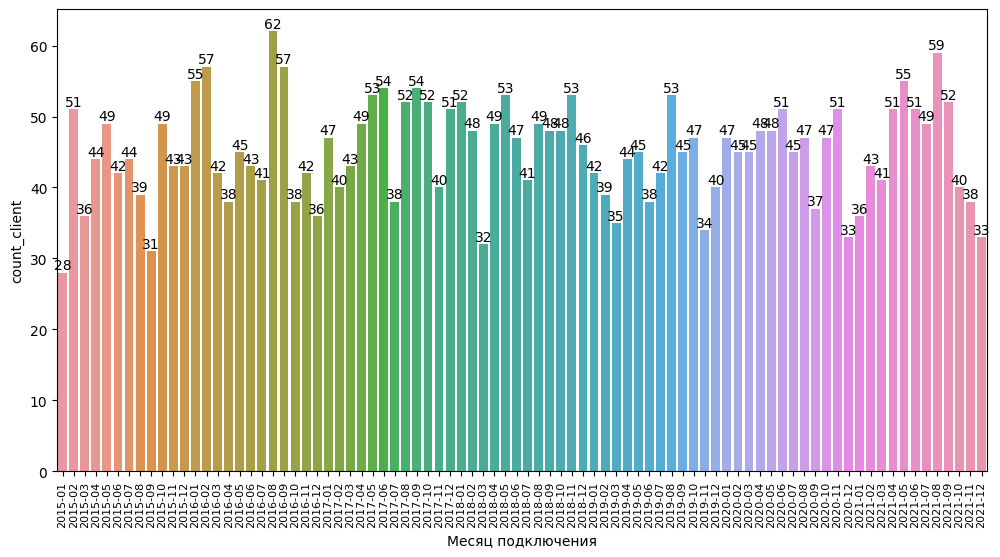

In [38]:
# рассмотрим подключение клиентов/месяц
df_count_client_month = df_work.groupby('Месяц подключения').\
agg(count_client = ('Месяц подключения','count')).\
reset_index()

fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.barplot(data = df_count_client_month,
            x = 'Месяц подключения',
            y = 'count_client');
ax.set_xticklabels(df_count_client_month['Месяц подключения'],
                   rotation = 90,
                   fontsize = 8);
ax.bar_label(ax.containers[0])

In [39]:
# минимум, максимум, медиана по месяцам
df_count_client_month['count_client'].agg(['min', 'median', 'max'])

min       28.0
median    45.0
max       62.0
Name: count_client, dtype: float64

Вывод:
Помесячная динамика подключения идентична год к году. Наблюдаем спады в начале весны и осени, пики приходятся на август.
Максимум 62 приходится на август 2016.
Минимум 28 на январь 2015.

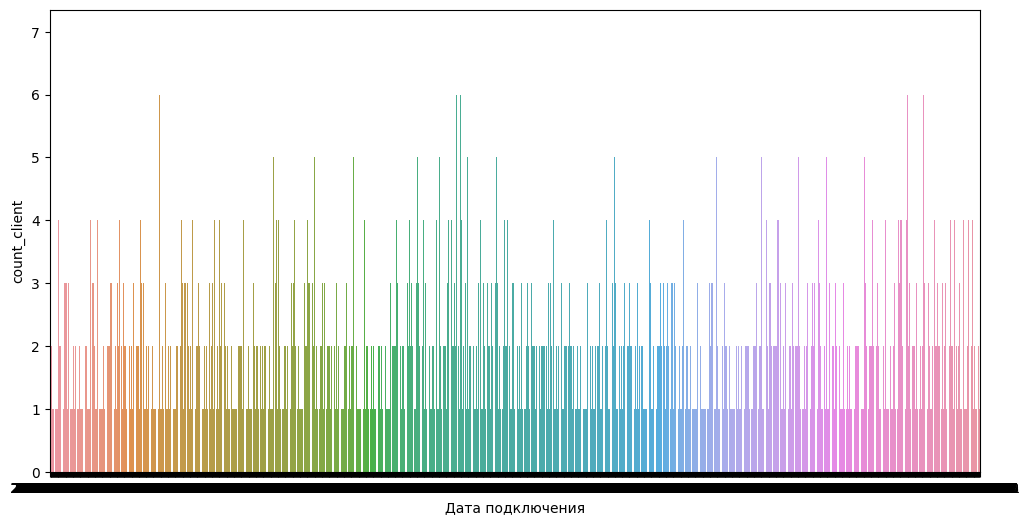

In [40]:
# рассмотрим подключение клиентов/день
df_count_client_day = df_work.groupby('Дата подключения').\
agg(count_client = ('Дата подключения','count')).\
reset_index()

fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.barplot(data = df_count_client_day,
            x = 'Дата подключения',
            y = 'count_client');

In [41]:
df_count_client_day.count_client.value_counts() /\
 df_count_client_day.shape[0] *100

1    43.482637
2    33.819829
3    14.745848
4     5.334675
5     1.761449
6     0.754907
7     0.100654
Name: count_client, dtype: float64

Вывод: в более 77% дней кол-во подключаемых абонентов не более 2 человек.

In [42]:
#  Шаг 4.2 в разрезе значений признака Возрастная категория
#  исследуйте распределение признаков...
df_work.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Доля звонков на стационарные телефоны',
       'Количество SMS за месяц', 'Дата подключения тарифа',
       'Возрастная категория', 'Год подключения', 'Месяц подключения',
       'Дата подключения'],
      dtype='object')

In [43]:
df_work.groupby(['Возрастная категория'])[['Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц']].\
       agg(['median', 'mean', 'std', 'sum'])

Среднемесячный расход                                     \
                                    median        mean         std        sum   
Возрастная категория                                                            
аспирант                           386.005  501.068799  344.281070  308658.38   
бизнесмен                          313.530  388.134819  320.350842  813530.58   
знаток                             190.120  300.680812  358.006020  174094.19   
студент                            133.010  188.587375  189.068242   94105.10   

                     Средняя продолжительность разговоров                      \
                                                   median      mean       std   
Возрастная категория                                                            
аспирант                                              3.8  4.513149  2.525552   
бизнесмен                                             3.2  3.848402  2.336772   
знаток                                                2.7  3.318307  2.044431   
студент                                               2.4  2.645691  2.017622   

                              Звонков днем за месяц                        \
                          sum                median       mean        std   
Возрастная категория                                                        
аспирант              2780.10                  58.0  64.866883  28.443385   
бизнесмен             8066.25                  53.0  53.714218  29.761228   
знаток                1921.30                  41.0  40.661485  35.027958   
студент               1320.20                  35.0  34.292585  18.544058   

                               Звонков вечером за месяц                        \
                           sum                   median       mean        std   
Возрастная категория                                                            
аспирант               39958.0                     78.0  81.102273  36.494404   
бизнесмен             112585.0                     66.0  66.803435  40.987972   
знаток                 23543.0                     43.0  50.284974  46.248763   
студент                17112.0                     69.0  67.551102  32.843044   

                               Звонков ночью за месяц                       \
                           sum                 median      mean        std   
Возрастная категория                                                         
аспирант               49959.0                    2.0  7.756494  16.212786   
бизнесмен             140020.0                    0.0  2.112118   5.446842   
знаток                 29115.0                    0.0  1.120898   3.038831   
студент                33708.0                    7.0  9.118236   9.393669   

                              
                         sum  
Возрастная категория          
аспирант              4778.0  
бизнесмен             4427.0  
знаток                 649.0  
студент               4550.0

In [44]:
df_work.groupby(['Возрастная категория'])[['Звонки в другие города',
      'Доля звонков на стационарные телефоны',
      'Количество SMS за месяц']].\
      agg(['median', 'mean', 'std', 'sum'])

Звонки в другие города                                \
                                     median      mean        std      sum   
Возрастная категория                                                        
аспирант                                4.0  9.076299  12.216437   5591.0   
бизнесмен                               2.0  8.531011  12.504930  17881.0   
знаток                                  0.0  5.360967  10.646698   3104.0   
студент                                 0.0  0.679359   2.248916    339.0   

                     Доля звонков на стационарные телефоны             \
                                                    median       mean   
Возрастная категория                                                    
аспирант                                              10.0  11.209416   
бизнесмен                                             10.0  10.486164   
знаток                                                 7.0   9.421416   
студент                                                3.0   3.677355   

                                        Количество SMS за месяц             \
                           std      sum                  median       mean   
Возрастная категория                                                         
аспирант              8.191805   6905.0                    25.0  31.782468   
бизнесмен             8.554963  21979.0                     4.0  13.388359   
знаток                7.492000   5455.0                     3.0   2.440415   
студент               3.471934   1835.0                    41.0  48.547094   

                                          
                            std      sum  
Возрастная категория                      
аспирант              23.620194  19578.0  
бизнесмен             19.010585  28062.0  
знаток                 1.702174   1413.0  
студент               27.434978  24225.0

[Text(0.5, 1.0, 'Среднемесячный расход выше у бизнесменов и аспирантов')]

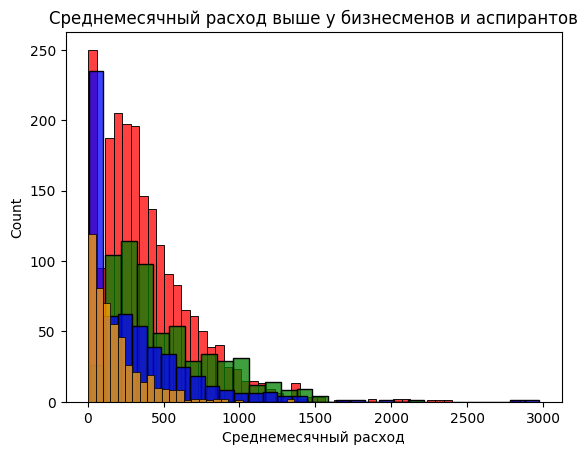

In [77]:
# Шаг 4.2 в разрезе значений признака Возрастная категория
# исследуйте распределение признаков ...
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Среднемесячный расход', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Среднемесячный расход', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Среднемесячный расход', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Среднемесячный расход', color = 'orange').\
             set (title = 'Среднемесячный расход выше у бизнесменов и аспирантов')

[Text(0.5, 1.0, 'Наибольшая продолжительность разговоров у бизнесменов')]

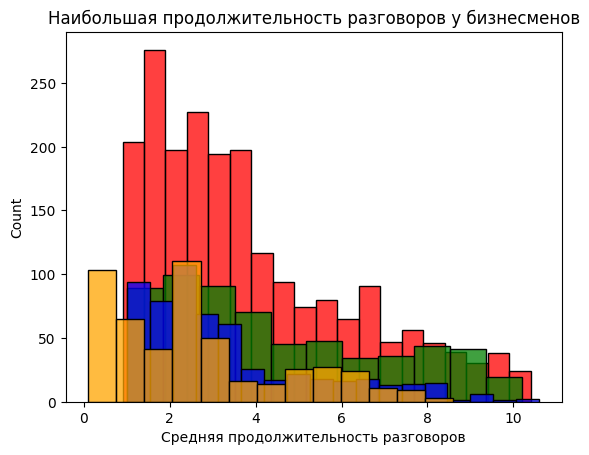

In [76]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Средняя продолжительность разговоров', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Средняя продолжительность разговоров', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Средняя продолжительность разговоров', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Средняя продолжительность разговоров', color = 'orange').\
             set (title = 'Наибольшая продолжительность разговоров у бизнесменов')

[Text(0.5, 1.0, 'Звонки днем предпочитают бизнесмены')]

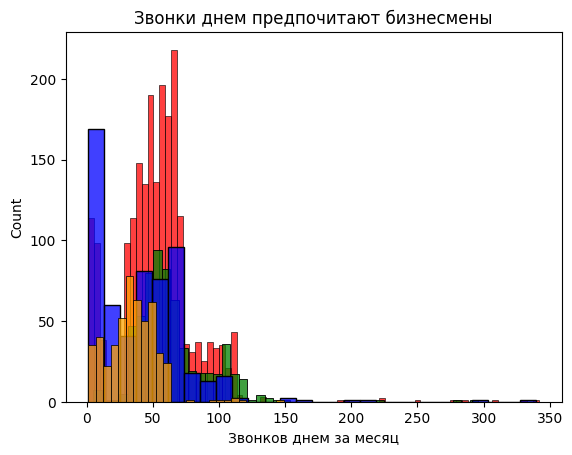

In [80]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Звонков днем за месяц', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Звонков днем за месяц', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Звонков днем за месяц', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Звонков днем за месяц', color = 'orange').\
             set (title = 'Звонки днем предпочитают бизнесмены')

[Text(0.5, 1.0, 'Звонки вечером предпочитают бизнесмены')]

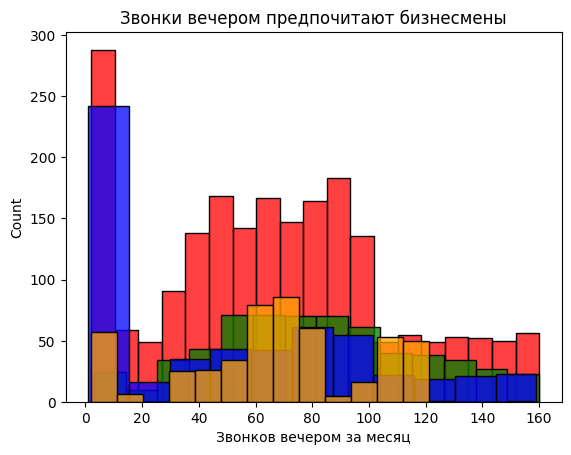

In [79]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Звонков вечером за месяц', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Звонков вечером за месяц', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Звонков вечером за месяц', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Звонков вечером за месяц', color = 'orange').\
             set (title = 'Звонки вечером предпочитают бизнесмены')

[Text(0.5, 1.0, 'Звонки ночью предпочитают студенты')]

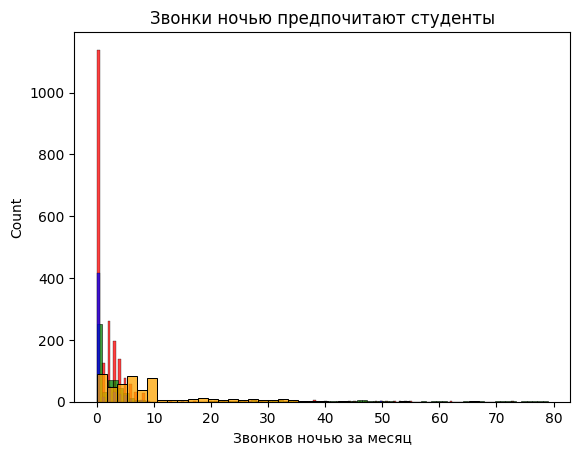

In [81]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Звонков ночью за месяц', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Звонков ночью за месяц', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Звонков ночью за месяц', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Звонков ночью за месяц', color = 'orange').\
             set (title = 'Звонки ночью предпочитают студенты')

[Text(0.5, 1.0, 'Звонки в другие города предпочитают бизнесмены')]

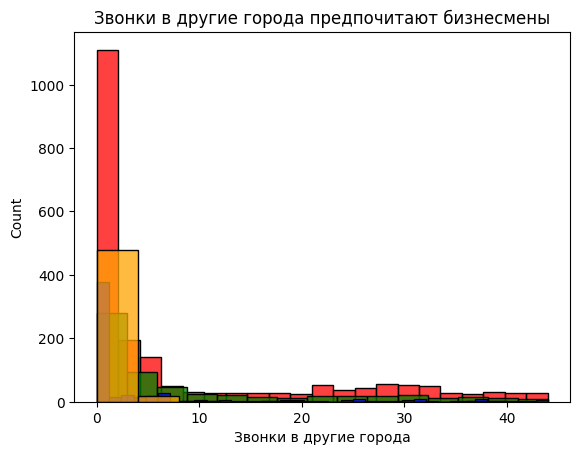

In [83]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Звонки в другие города', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Звонки в другие города', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Звонки в другие города', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Звонки в другие города', color = 'orange').\
             set (title = 'Звонки в другие города предпочитают бизнесмены')

[Text(0.5, 1.0, 'Доля звонков на стационарные телефоны выше у бизнесменов')]

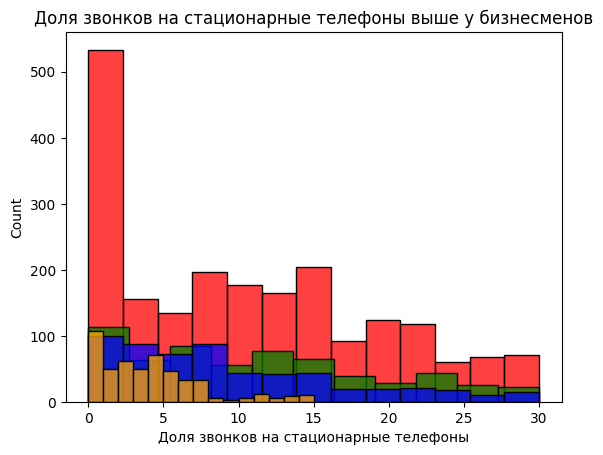

In [85]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Доля звонков на стационарные телефоны', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Доля звонков на стационарные телефоны', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Доля звонков на стационарные телефоны', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Доля звонков на стационарные телефоны', color = 'orange').\
             set (title = 'Доля звонков на стационарные телефоны выше у бизнесменов')

[Text(0.5, 1.0, 'Количество SMS за месяц выше у студентов')]

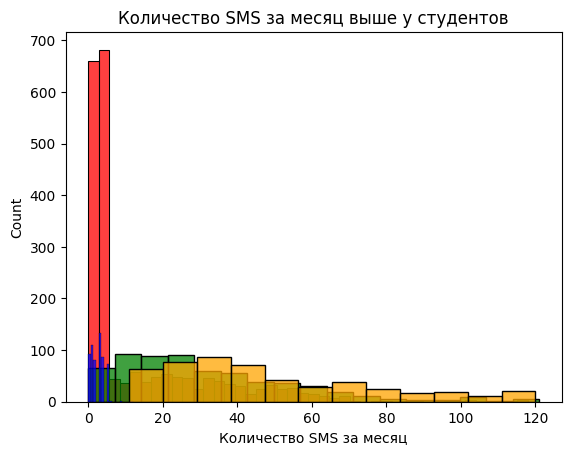

In [87]:
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'бизнесмен'],
             x = 'Количество SMS за месяц', color = 'red')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'аспирант'],
             x = 'Количество SMS за месяц', color = 'green')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'знаток'],
             x = 'Количество SMS за месяц', color = 'blue')
sns.histplot (data = df_work[df_work['Возрастная категория'] == 'студент'],
             x = 'Количество SMS за месяц', color = 'orange').\
             set (title = 'Количество SMS за месяц выше у студентов')

Вывод по шагу 4.2:
- Студенты предпочитают СМС и звонки в ночное время.
- По остальным признакам лидируют бизнесмены.

In [48]:
# Шаг 4.3
# клиенты каких возрастных категорий (ТОП-2)
df_work.groupby(['Возрастная категория']).\
              agg(sred_pay = ('Среднемесячный расход',\
              'mean')).round(0).sort_values (by = ['sred_pay'],\
              ascending = False).head (2)

sred_pay
Возрастная категория          
аспирант                 501.0
бизнесмен                388.0

In [49]:
df_work.groupby(['Возрастная категория']).\
              agg(sred_call_day = ('Звонков днем за месяц',\
              'mean')).round(0).sort_values (by = ['sred_call_day'],\
              ascending = False).head (2)

sred_call_day
Возрастная категория               
аспирант                       65.0
бизнесмен                      54.0

In [50]:
df_work.groupby(['Возрастная категория']).\
              agg(sred_call_evening = ('Звонков вечером за месяц',\
              'mean')).round(0).sort_values (by = ['sred_call_evening'],\
              ascending = False).head (2)

sred_call_evening
Возрастная категория                   
аспирант                           81.0
студент                            68.0

In [51]:
df_work.groupby(['Возрастная категория']).\
              agg(sred_call_night = ('Звонков ночью за месяц',\
              'mean')).round(0).sort_values (by = ['sred_call_night'],\
              ascending = False).head (2)

sred_call_night
Возрастная категория                 
студент                           9.0
аспирант                          8.0

Выводы по шагу 4.3:

- Информация о средних значениях признаков опровергает выводы 4.2. Аспиранты в среднем платят больше бизнесменов и больше них совершают звонков днём и вечером.

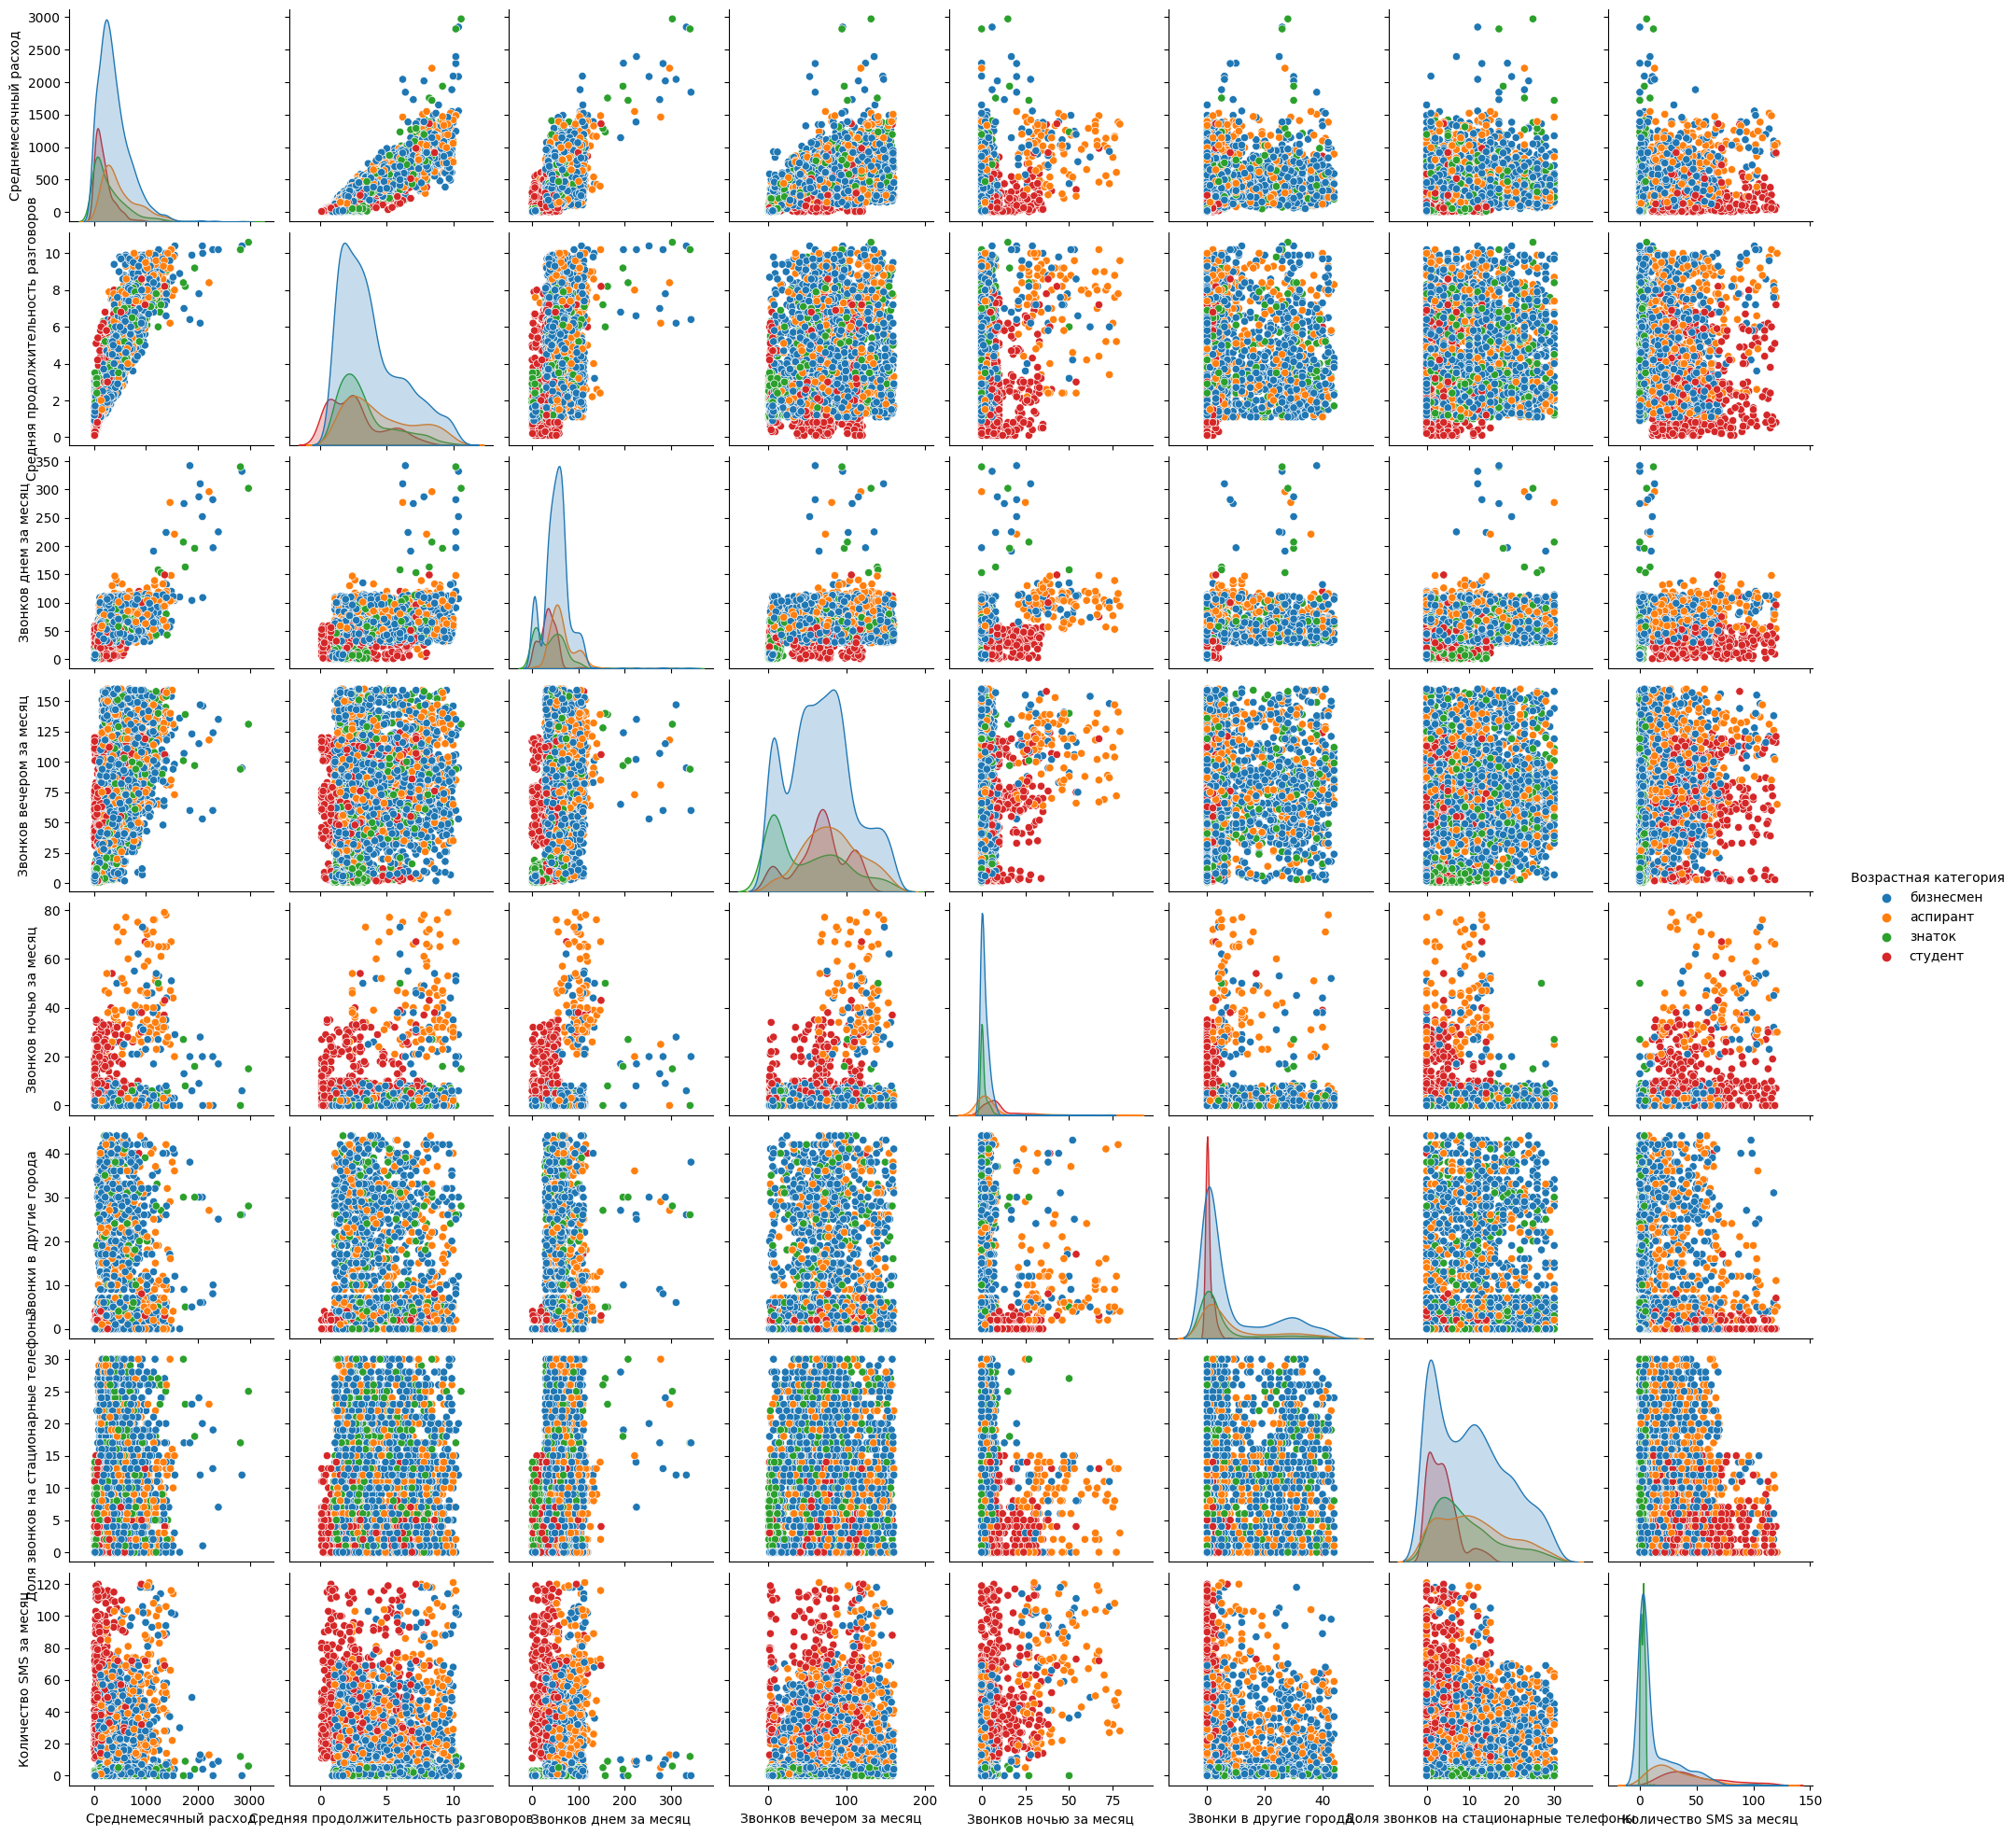

In [ ]:
# Шаг 4.4
# Построение диаграмм рассеивания
sns.pairplot(data = df_work,
             vars = ['Среднемесячный расход',
                     'Средняя продолжительность разговоров',
                     'Звонков днем за месяц',
                     'Звонков вечером за месяц',
                     'Звонков ночью за месяц',
                     'Звонки в другие города',
                     'Доля звонков на стационарные телефоны',
                     'Количество SMS за месяц'],
             hue = 'Возрастная категория')

Вывод в разрезе возрастных категорий:
- Студенты.
Имея среднемесячный расход ниже среднего, предпочитают СМС и ночные звонки.
- Аспиранты.
Тратят на связь больше студентов, предпочитая более продолжительные звонки днём.
- Бизнесмены.
Наибольшая категория как по количеству абонентов, так и по количеству звонков днём и вечером.
- Знатоки.
Отличительных характеристик не выявлено.


--- ИТОГОВЫЙ ВЫВОД ---


Предложения для возрастных групп:
- Студенты.
Для привлечения данного канала можно отметить выгоду для клиентов в увеличении длительности звонков и СМС в ночное время, т. к. данная группа проявляет активность.

- Аспиранты.
Небольшая по представленности, активная и платежеспособная группа. Необходимо увеличение числа абонентов в первую очередь. Рекомендуется проведение маркетинговых акций для увеличения числа абонентов.

- Знатоки.
Слабо представленная и не активная группа пользователей. Возможный канал привлечения - использование в связках с другими категориями абонентов. К примеру, "Звонки на любимый номер", "СМС внукам" и т. д.

- Бизнесмены.
Наиболее представленная категория. Активные, платежеспособные пользователи. Рекомендуется работать в направлении развития сервиса для абонентов. Возможны "пакетные" предложения.


